In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyomo.environ import *

# **Prediction**

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load your DataFrame df
df= pd.read_csv('/content/drive/MyDrive/Capstone Project MMAI/Final Dataset For Model/indoor_parking.csv')

In [5]:
df

,Property Code,2022 Indoor Comp price,2023 Indoor Comp price,Total Units (2022Jul) (Indoor Parking),Occupied (2022Jul) (Indoor Parking),Percentage% (2022Jul) (Indoor Parking),New Lease (2022Jul) (Indoor Parking),Ending Lease (2022Jul) (Indoor Parking),Market Price (2022Jul) (Indoor Parking),Current Price (2022Jul) (Indoor Parking),...,Ending_Lease_Rate% (2023Apr) (Indoor Parking),Total Units (2023May) (Indoor Parking),Occupied (2023May) (Indoor Parking),Percentage% (2023May) (Indoor Parking),New Lease (2023May) (Indoor Parking),Ending Lease (2023May) (Indoor Parking),Market Price (2023May) (Indoor Parking),Current Price (2023May) (Indoor Parking),Lease_Turnover_Rate% (2023May) (Indoor Parking),Ending_Lease_Rate% (2023May) (Indoor Parking)
0,y31201,82.500000,83.750000,48.0,28.0,58.33,2.0,0.0,75.0,75.000000,...,156.25,48.0,26.0,54.17,0.0,24.0,75.0,78.333333,50.00,156.25
1,y31202,82.500000,83.750000,31.0,31.0,100.00,1.0,3.0,85.0,84.333333,...,274.19,31.0,30.0,96.77,0.0,3.0,85.0,110.000000,9.68,274.19
2,y31251,93.750000,125.000000,82.0,55.0,67.07,1.0,3.0,110.0,109.636364,...,134.15,82.0,59.0,71.95,2.0,31.0,110.0,110.000000,37.80,134.15
3,y31300,117.500000,121.250000,233.0,172.0,73.82,8.0,7.0,135.0,134.464286,...,56.49,239.0,165.0,69.04,2.0,90.0,135.0,136.049383,37.66,56.49
4,y31600,0.000000,0.000000,172.0,143.0,83.14,1.0,4.0,75.0,64.962121,...,42.61,176.0,140.0,79.55,5.0,53.0,75.0,67.595420,30.11,42.61
5,y31602,0.000000,96.666667,151.0,125.0,82.78,6.0,0.0,75.0,73.440000,...,51.02,147.0,139.0,94.56,4.0,15.0,75.0,73.605839,10.20,51.02
6,y40210,78.750000,77.500000,92.0,87.0,94.57,9.0,18.0,95.0,98.279070,...,104.40,93.0,86.0,92.47,3.0,32.0,95.0,113.023529,34.41,102.15
7,y40230,0.000000,71.666667,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
8,y40790,156.250000,156.250000,169.0,120.0,71.01,11.0,29.0,140.0,141.100917,...,83.33,172.0,107.0,62.21,8.0,88.0,140.0,141.010101,51.16,81.40
9,y40910,0.000000,38.666667,382.0,163.0,42.67,12.0,42.0,75.0,75.000000,...,19.63,382.0,187.0,48.95,15.0,234.0,75.0,75.000000,61.26,19.63


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 66 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Property Code                                    40 non-null     object 
 1   2022 Indoor Comp price                           40 non-null     float64
 2   2023 Indoor Comp price                           40 non-null     float64
 3   Total Units (2022Jul) (Indoor Parking)           40 non-null     float64
 4   Occupied (2022Jul) (Indoor Parking)              40 non-null     float64
 5   Percentage% (2022Jul) (Indoor Parking)           40 non-null     float64
 6   New Lease (2022Jul) (Indoor Parking)             40 non-null     float64
 7   Ending Lease (2022Jul) (Indoor Parking)          40 non-null     float64
 8   Market Price (2022Jul) (Indoor Parking)          40 non-null     float64
 9   Current Price (2022Jul) (Indoor Pa

In [7]:
# Select relevant columns for the regression model
feature_columns = [col for col in df.columns if col not in ['Property Code', 'Percentage% (2023May) (Indoor Parking)']]
target_column = 'Percentage% (2023May) (Indoor Parking)'

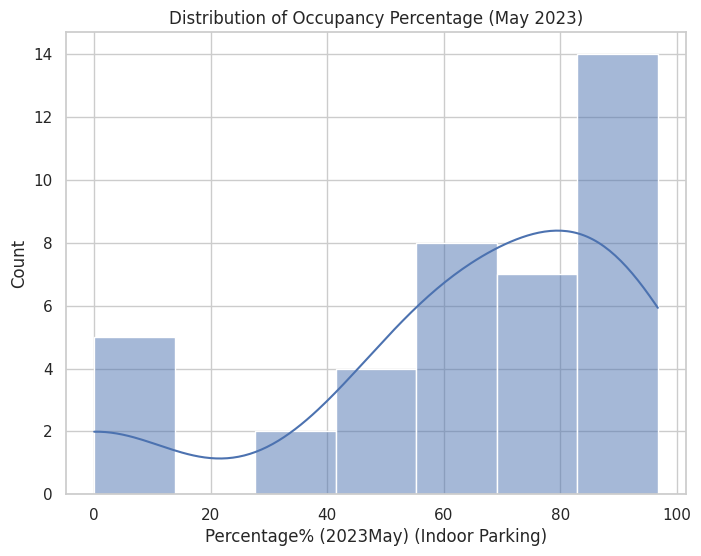

In [8]:
# Set the style of seaborn for our plots
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df[target_column], kde=True)
plt.title('Distribution of Occupancy Percentage (May 2023)')
plt.show()

In [9]:
# Prepare the data
X = df[feature_columns]
y = df[target_column]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Get feature importances
importances = rf.feature_importances_
features_importances = sorted(zip(importances, X.columns), reverse=True)

In [13]:
# Print feature importances
for importance, name in features_importances:
    print(f"Feature: {name}, Importance: {importance}")

Feature: Percentage% (2022Dec) (Indoor Parking), Importance: 0.11602390297017542
Feature: Percentage% (2023Apr) (Indoor Parking), Importance: 0.10406437716161589
Feature: Percentage% (2022Oct) (Indoor Parking), Importance: 0.0698123974343701
Feature: Percentage% (2022Jul) (Indoor Parking), Importance: 0.05926820754984906
Feature: Percentage% (2022Aug) (Indoor Parking), Importance: 0.05511978475380323
Feature: Percentage% (2022Sep) (Indoor Parking), Importance: 0.05171406494943062
Feature: Current Price (2022Jul) (Indoor Parking), Importance: 0.033305082982171795
Feature: Ending_Lease_Rate% (2022Oct) (Indoor Parking), Importance: 0.03322717867430638
Feature: Occupied (2023May) (Indoor Parking), Importance: 0.030807973636871468
Feature: Lease_Turnover_Rate% (2022Dec) (Indoor Parking), Importance: 0.029112474306169586
Feature: Occupied (2022Sep) (Indoor Parking), Importance: 0.024405757256878557
Feature: Ending_Lease_Rate% (2022Aug) (Indoor Parking), Importance: 0.023426356400987294
Featu

In [14]:
# Select the most important features
important_features = [name for importance, name in features_importances if importance > 0.01]

# Prepare the data with only the most important features
X = df[important_features]


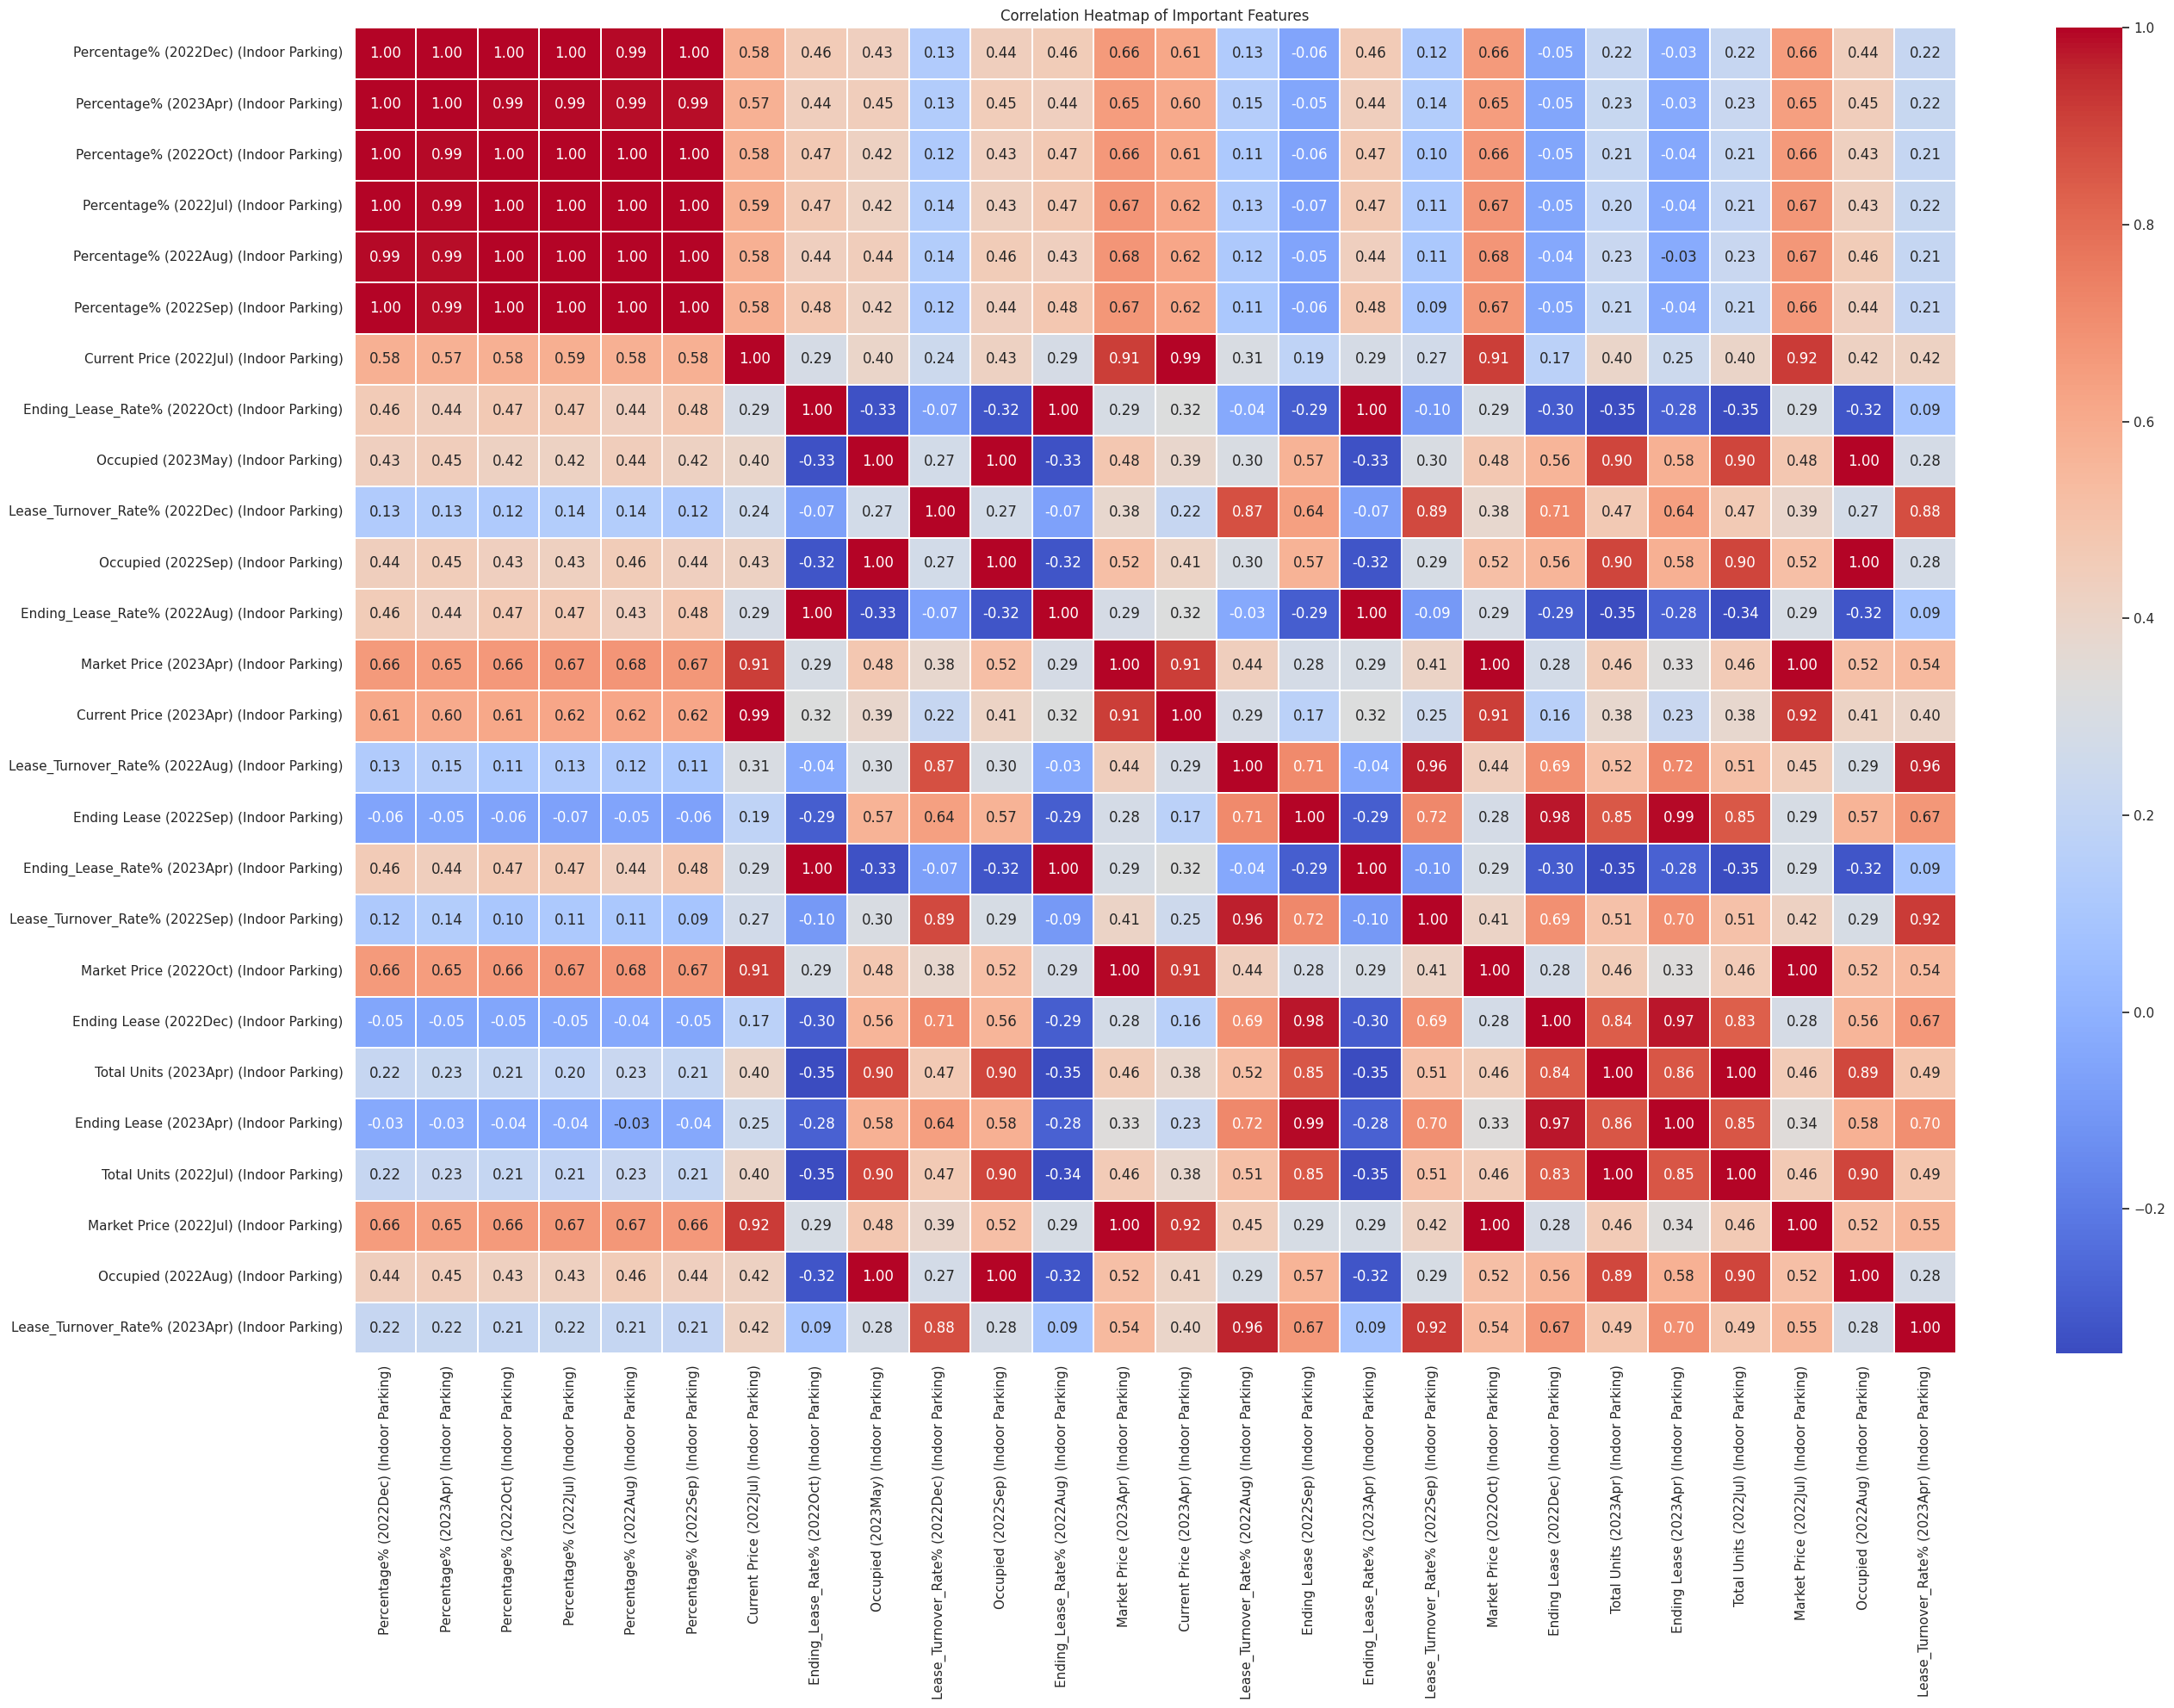

In [15]:
# Correlation heatmap of the important features
corr = df[important_features].corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.1, linecolor='white', cbar=True)
plt.title('Correlation Heatmap of Important Features')
plt.show()

In [16]:
# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the Random Forest model again
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Predict the target variable for the test data
y_pred = rf.predict(X_test)

In [19]:
# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 3.018760664784482


<ipython-input-20-9aa48945342c>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')


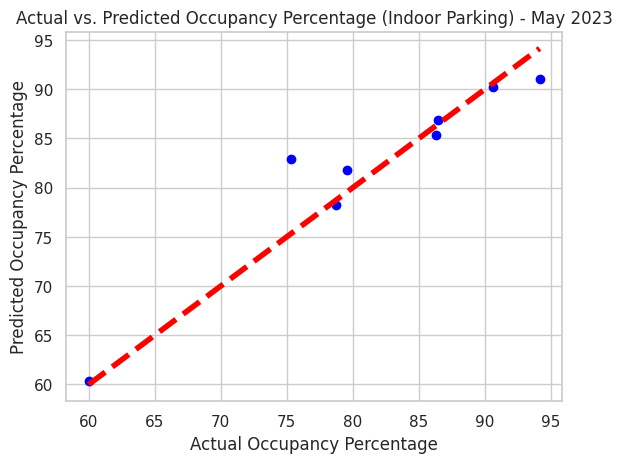

In [20]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')
plt.xlabel('Actual Occupancy Percentage')
plt.ylabel('Predicted Occupancy Percentage')
plt.title('Actual vs. Predicted Occupancy Percentage (Indoor Parking) - May 2023')
plt.show()


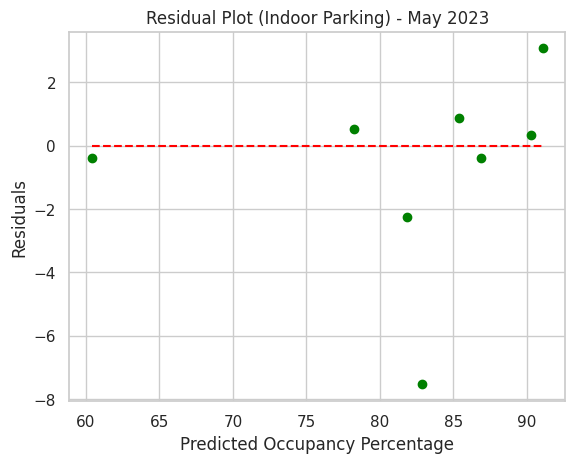

In [21]:
# Residual plot
residuals_indoor = y_test - y_pred
plt.scatter(y_pred, residuals_indoor, color='green')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Occupancy Percentage')
plt.ylabel('Residuals')
plt.title('Residual Plot (Indoor Parking) - May 2023')
plt.show()

# **OPTIMIZATION**

In [22]:
# Create a concrete model
model = ConcreteModel()

# Define the decision variables
model.price = Var(df.index, domain=NonNegativeReals)

In [23]:
# Define the objective function
def objective_rule(model):
    return sum(df.loc[i, target_column] * model.price[i] for i in df.index)
model.objective = Objective(rule=objective_rule, sense=maximize)

In [24]:
# Define the objective function
def objective_rule(model):
    return sum(df.loc[i, target_column] * model.price[i] for i in df.index)
model.objective = Objective(rule=objective_rule, sense=maximize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [25]:
# Define the lower limit constraint for each property's price (must be >= market price)
def price_lower_limit_constraint_rule(model, i):
    return model.price[i] >= df.loc[i, 'Market Price (2023May) (Indoor Parking)']
model.price_lower_limit_constraint = Constraint(df.index, rule=price_lower_limit_constraint_rule)

# Define the upper limit constraint for each property's price (must be <= 1.1 times market price)
price_upper_limit = 1.1 # Can be changed
def price_upper_limit_constraint_rule(model, i):
    return model.price[i] <= price_upper_limit * df.loc[i, 'Market Price (2023May) (Indoor Parking)']
model.price_upper_limit_constraint = Constraint(df.index, rule=price_upper_limit_constraint_rule)

In [26]:
# Solve the model
solver = SolverFactory('glpk')
solver.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 313804.48, 'Upper bound': 313804.48, 'Number of objectives': 1, 'Number of constraints': 80, 'Number of variables': 40, 'Number of nonzeros': 80, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.014034509658813477}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [27]:
# After solving the model
optimal_prices = [model.price[i].value for i in df.index]
max_revenue = model.objective()

print("Optimal prices: ", optimal_prices)
print("Maximum revenue: ", max_revenue)


Optimal prices:  [82.5, 93.5, 121.0, 148.5, 82.5, 82.5, 104.5, 0.0, 154.0, 82.5, 137.5, 121.0, 121.0, 165.0, 60.5, 99.0, 137.5, 0.0, 143.0, 132.0, 154.0, 0.0, 132.0, 110.0, 148.5, 126.5, 93.5, 220.0, 0.0, 89.1, 66.0, 148.5, 148.5, 110.0, 110.0, 110.0, 0.0, 110.0, 198.0, 143.0]
Maximum revenue:  313804.48000000004
